In [7]:
# Importing init
execfile("init.py")

In [8]:
# Importing data processing files
execfile("data_processing.py")

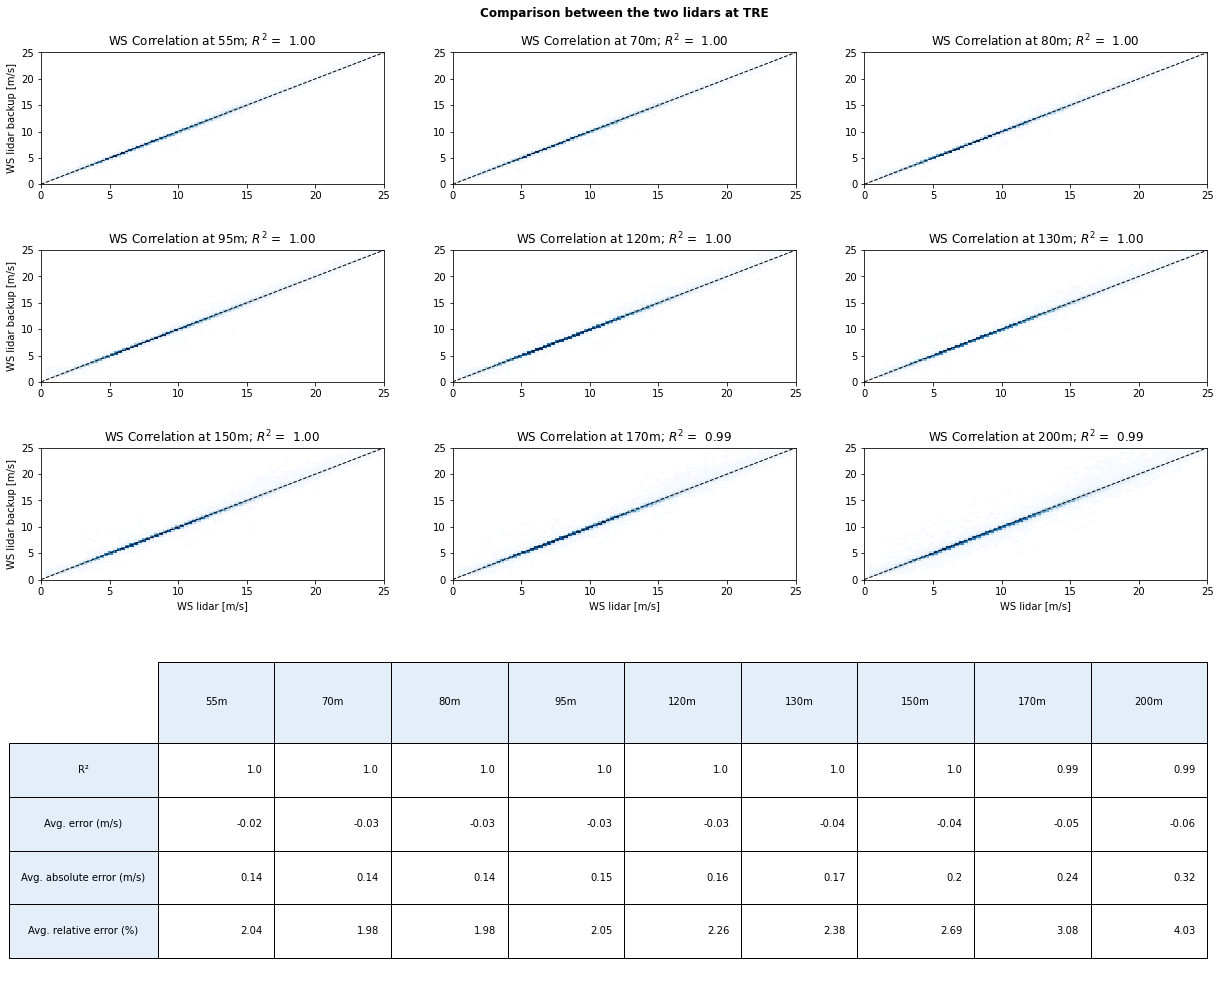

In [9]:
fig = plt.figure(figsize=(18,14))
fig.tight_layout(pad=3)

spec = GridSpec(5,3, figure=fig)

column_headers = []

row_headers = ["R²", "Avg. error (m/s)", "Avg. absolute error (m/s)", "Avg. relative error (%)"]

cell_text = np.zeros((len(row_headers), len(heights)))

r = 0
c = 0

for i in range(len(heights)):
    
    z = heights[i]
    
    if c > 2:
        c = 0
        r += 1
    
    column_headers += [str(z)+"m"]
    
    df_temp = df.loc[:,df.columns.str.contains(f"{z}")]
       
    
    # R² value
    lr = st.linregress(df_temp[f"WS_{z}m_backup"],df_temp[f"WS_{z}m"]) #scipy stats built-in linear regression function
    
    cell_text[0][i] = '{: 0.2f}'.format(lr.rvalue**2)
    
    
    # Mean error
    df_subtract = df_temp[f"WS_{z}m"].subtract(df_temp[f"WS_{z}m_backup"], axis = 0)
    subtract_avg = df_subtract.mean()
    
    cell_text[1][i] = '{: 0.2f}'.format(subtract_avg)
    
    
    # Mean absolute error
    df_subtract_abs = df_subtract.abs()
    subtract_abs_avg = df_subtract_abs.mean()
    
    cell_text[2][i] = '{: 0.2f}'.format(subtract_abs_avg)
    
       
    # Average relative error
    df_relative_error = 100 * df_subtract_abs.divide(df_temp[f"WS_{z}m_backup"], axis = 0)
    relative_error_avg = df_relative_error.mean()
    cell_text[3][i] = '{: 0.2f}'.format(relative_error_avg)           
        
        
    ## Histogram
    
    ax = fig.add_subplot(spec[r, c])
    
    ax.hist2d(df_temp[f"WS_{z}m_backup"], df_temp[f"WS_{z}m"], 100, cmin=0.0001, cmap=cmap) 
    
    if c == 0:
        ax.set_ylabel("WS lidar backup [m/s]")

    if r == 2:
        ax.set_xlabel("WS lidar [m/s]")
        
    ax.set_xlim([0, 25])
    ax.set_ylim([0, 25])
        
    xpoints = ypoints = ax.get_xlim()
    ax.axline((xpoints[0], ypoints[0]), (xpoints[1], ypoints[1]), linestyle='--', color='k', lw=1)
    
    # on the title, I write the height of the plot and the R2 value
    ax.set_title(f"WS Correlation at {z}m; $R^2$ = {lr.rvalue**2: 0.2f}")

    c += 1


if cmap == 'Blues':
    rcolors = plt.cm.Blues(np.full(len(row_headers), 0.1))
    ccolors = plt.cm.Blues(np.full(len(column_headers), 0.1))
else:
    rcolors = plt.cm.Greens(np.full(len(row_headers), 0.1))
    ccolors = plt.cm.Greens(np.full(len(column_headers), 0.1))

ax = fig.add_subplot(spec[3:5, :])

ytable = ax.table(cellText=cell_text,
            rowLabels=row_headers,
            rowColours=rcolors,
            rowLoc='center',
            colColours=ccolors,
            colLabels=column_headers,
            loc='center',
            bbox=[0.1, 0.05, 0.9, 0.9])

ax.axis('tight')
ax.axis('off')

fig.suptitle(f"Comparison between the two lidars at {site}", fontweight="bold")

cellDict = ytable.get_celld()
for i in range(0, len(cell_text[0])):
    cellDict[(0,i)].set_height(.15)
    for j in range(1, len(cell_text)+1):
        cellDict[(j,i)].set_height(.1)

for i in range(1, len(cell_text)+1):
    cellDict[(i,-1)].set_height(.1)

fig.subplots_adjust(left=0.05, bottom=0.02, right=0.95, top=0.935, hspace=0.5, wspace=0.2)

if Save_files == "Yes":
    fig.savefig(f"{maindir}/3 Results/Lidar comparison/{site}_lidar_comparison.jpg", dpi=480)

In [10]:
df_comp = df_lidar_filtered - df_lidar_backup_filtered
df_comp.dropna(inplace=True)
df_comp

,WS_120m,WS_120m_backup,WS_130m,WS_130m_backup,WS_150m,WS_150m_backup,WS_170m,WS_170m_backup,WS_200m,WS_200m_backup,WS_55m,WS_55m_backup,WS_70m,WS_70m_backup,WS_80m,WS_80m_backup,WS_95m,WS_95m_backup
DataTimeStamp,,,,,,,,,,,,,,,,,,


In [11]:
df_lidar_backup

,Average Motion Compensated 40m Wind Speed,Average Motion Compensated 55m Wind Speed,Average Motion Compensated 70m Wind Speed,Average Motion Compensated 80m Wind Speed,Average Motion Compensated 95m Wind Speed,Average Motion Compensated 105m Wind Speed,Average Motion Compensated 120m Wind Speed,Average Motion Compensated 130m Wind Speed,Average Motion Compensated 150m Wind Speed,Average Motion Compensated 170m Wind Speed,Average Motion Compensated 185m Wind Speed,Average Motion Compensated 200m Wind Speed
DataTimeStamp,,,,,,,,,,,,
2017-10-26 22:10:00,4.82,4.95,4.92,4.93,4.96,4.99,4.99,4.98,4.97,4.88,4.71,4.74
2017-10-26 22:20:00,4.01,4.11,4.10,4.09,4.08,4.08,4.07,4.05,4.00,4.04,4.10,4.33
2017-10-26 22:30:00,5.05,5.09,5.04,5.01,4.96,4.91,4.81,4.74,4.77,5.10,5.34,5.65
2017-10-26 22:40:00,5.79,5.84,5.82,5.82,5.83,5.85,5.84,5.83,5.80,5.76,5.73,5.74
2017-10-26 22:50:00,6.06,6.13,6.14,6.15,6.14,6.14,6.17,6.18,6.23,6.27,6.28,6.23
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-19 06:20:00,5.02,5.12,5.20,5.21,5.25,5.27,5.28,5.28,5.21,5.11,5.02,4.95
2019-03-19 06:30:00,4.75,4.73,4.74,4.76,4.81,4.86,4.92,4.97,5.10,4.99,4.90,4.79
2019-03-19 08:20:00,5.00,4.99,4.98,4.95,4.95,4.97,5.02,5.08,5.26,5.46,5.47,5.38


In [12]:
df_lidar

,Average Horizontal Wind Speed 35m,Average Horizontal Wind Speed 55m,Average Horizontal Wind Speed 70m,Average Horizontal Wind Speed 80m,Average Horizontal Wind Speed 95m,Average Horizontal Wind Speed 120m,Average Horizontal Wind Speed 130m,Average Horizontal Wind Speed 150m,Average Horizontal Wind Speed 170m,Average Horizontal Wind Speed 200m
DataTimeStamp,,,,,,,,,,
2015-05-03 00:00:00,7.03,7.24,8.06,8.69,9.81,10.55,11.36,11.71,12.31,12.05
2015-05-03 00:10:00,6.51,7.23,8.05,8.55,9.90,10.92,10.75,11.38,11.69,12.05
2015-05-03 00:20:00,7.28,8.17,8.47,8.96,9.74,10.55,10.71,10.84,11.23,11.37
2015-05-03 00:30:00,7.97,8.73,9.22,9.32,9.51,9.86,10.01,10.15,10.31,10.94
2015-05-03 00:40:00,7.89,8.29,8.63,8.64,8.96,9.10,9.45,9.47,9.80,10.51
...,...,...,...,...,...,...,...,...,...,...
2019-05-23 23:10:00,6.24,6.48,6.66,6.83,6.94,7.09,7.12,6.95,6.78,6.73
2019-05-23 23:20:00,6.12,6.36,6.59,6.71,6.85,6.76,6.78,6.75,6.65,6.63
2019-05-23 23:30:00,6.00,6.26,6.34,6.46,6.58,6.65,6.67,6.74,6.80,6.86
